<a href="https://colab.research.google.com/github/niyaudinoor/HackathonNAAN/blob/main/Turbidity_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import graphviz
from IPython.display import display, HTML

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split

# Scikit-learn: Regression models
from sklearn.ensemble import RandomForestRegressor

# Scikit-learn: Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz
from sklearn import tree

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Define the path to the CSV file containing water quality data
csv_path = "/content/drive/MyDrive/6. Colab Notebooks/2. Water Quality/water_data_full - Final_Test.csv"

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_path)

df.head()

,Date,Average Temperature C,Average pH,Average Specific Conductance μS/cm,Average Turbidity FNU,Average Dissolved Oxygen mg/l,Average Dissolved Oxygen +1 day mg/l,Average Dissolved Oxygen +1 week mg/l,Average Dissolved Oxygen +4 weeks mg/l,Average Temperature C +1 day,...,Average Temperature C +4 weeks,Average pH + 1 day,Average pH + 1 week,Average pH + 4 weeks,Average Specific Conductance μS/cm +1 day,Average Specific Conductance μS/cm +1 week,Average Specific Conductance μS/cm +4 weeks,Average Turbidity FNU + 1 day,Average Turbidity FNU + 1 week,Average Turbidity FNU + 4 weeks
0,2024-05-01,19.8,8.3,1185.3,39.7,9.9,9.8,9.5,7.3,20.0,...,24.1,8.3,8.1,7.7,1120.0,697.8,1060.0,43.1,36.0,47.1
1,2024-05-02,20.0,8.3,1007.0,43.1,9.8,9.7,9.5,7.1,20.9,...,23.7,8.3,8.2,7.7,1007.0,713.6,1094.5,41.4,34.8,43.9
2,2024-05-03,20.9,8.3,864.5,41.4,9.7,8.7,9.4,6.9,19.7,...,24.9,8.1,8.1,7.7,864.5,761.3,1199.9,37.6,30.9,39.1
3,2024-05-04,19.7,8.1,831.7,37.6,8.7,9.0,9.4,6.6,18.7,...,25.8,8.1,8.1,7.7,831.7,741.2,1372.7,33.8,25.2,39.3
4,2024-05-05,18.7,8.1,825.8,33.8,9.0,9.4,9.3,6.4,19.1,...,25.5,8.1,8.1,7.6,825.8,675.2,1432.4,32.2,22.4,41.1


# 4. Preprocessing the Dataset

## 4.1 Separating the Dataset into Inputs and Target

Code Block 4A

In [ ]:
# Drop the 'Date' column and the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the input features DataFrame
inputs = df.drop(['Date', 'Average Specific Conductance μS/cm +1 day', 'Average Specific Conductance μS/cm +1 week', 'Average Specific Conductance μS/cm +4 weeks'], axis='columns')

# Select the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the target DataFrame
target = df[['Average Turbidity FNU + 1 day','Average Turbidity FNU + 1 week','Average Turbidity FNU + 4 weeks']]

Code Block 4B

In [ ]:
# Convert the inputs DataFrame to a NumPy array with float data type
inputs = np.array(inputs, dtype=float)

# Convert the target DataFrame to a NumPy array with float data type
target = np.array(target, dtype=float)

## 4.2 Splitting the Training and Testing Data

Code Block 4C

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (73, 17)
X_test shape: (19, 17)
y_train shape: (73, 3)
y_test shape: (19, 3)


# 5. Training the Model


Code Block 5A

In [ ]:
# Initialize a RandomForestRegressor model from the scikit-learn library
model = RandomForestRegressor()

Code Block 5B

In [ ]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model.fit(X_train, y_train)

RandomForestRegressor()

Code Block 5C

In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 1)

# Printing the predicted labels
print(rounded_y_pred)

[[38.3 39.6 68. ]
 [36.5 39.8 35.4]
 [37.2 36.6 32. ]
 [41.5 41.2 32.2]
 [40.2 34.3 41.6]
 [44.6 41.2 30.8]
 [36.1 39.7 64.2]
 [71.2 38.6 36.1]
 [22.2 15.4 33.8]
 [40.8 36.1 62.8]
 [26.4 40.8 37.6]
 [38.6 40.  33.2]
 [38.7 34.9 37.9]
 [35.8 78.4 37.8]
 [18.9 16.7 34.8]
 [32.3 21.7 39.6]
 [16.1 41.2 41.2]
 [43.7 39.6 33.4]
 [36.7 34.8 55.3]]


In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 1)

# Printing the predicted labels
print(rounded_y_pred)

[[38.3 39.6 68. ]
 [36.5 39.8 35.4]
 [37.2 36.6 32. ]
 [41.5 41.2 32.2]
 [40.2 34.3 41.6]
 [44.6 41.2 30.8]
 [36.1 39.7 64.2]
 [71.2 38.6 36.1]
 [22.2 15.4 33.8]
 [40.8 36.1 62.8]
 [26.4 40.8 37.6]
 [38.6 40.  33.2]
 [38.7 34.9 37.9]
 [35.8 78.4 37.8]
 [18.9 16.7 34.8]
 [32.3 21.7 39.6]
 [16.1 41.2 41.2]
 [43.7 39.6 33.4]
 [36.7 34.8 55.3]]


Code Block 5D

In [ ]:
# Rounding to 1 decimal place
rounded_y_test = np.round(y_test, 1)

print(rounded_y_test)

[[36.4 40.2 78.9]
 [37.7 43.9 36.1]
 [35.8 36.9 17.8]
 [39.3 45.5 27.5]
 [43.1 36.  47.1]
 [45.2 40.3 28.6]
 [31.6 41.8 73.8]
 [78.9 37.  42. ]
 [22.4 13.  32.1]
 [43.6 33.1 64.4]
 [25.3 37.7 35.7]
 [40.8 40.1 31.2]
 [37.7 36.8 37.8]
 [31.2 76.9 37.7]
 [19.1 18.8 31.6]
 [32.2 22.4 41.1]
 [18.8 40.6 41.8]
 [43.9 38.7 35.8]
 [36.1 35.8 58.7]]


# 6. Evaluating the Model

Code Block 6A

In [ ]:
# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))
mae_1day = np.mean(np.abs(y_test[0] - y_pred[0]))
mae_7days = np.mean(np.abs(y_test[1] - y_pred[1]))
mae_30days = np.mean(np.abs(y_test[2] - y_pred[2]))

print("Overall Mean Absolute Error:", mae)
print("1 day Mean Absolute Error:", mae_1day)
print("1 Week Mean Absolute Error:", mae_7days)
print("4 weeks Mean Absolute Error:", mae_30days)

Overall Mean Absolute Error: 2.5096491228070152
1 day Mean Absolute Error: 4.472333333333346
1 Week Mean Absolute Error: 1.9860000000000255
4 weeks Mean Absolute Error: 5.305000000000004


Code Block 6B

In [ ]:
# Define a function to calculate the Mean Absolute Percentage Error (MAPE)
# between the true values (y_true) and the predicted values (y_pred)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
mape_1day = mean_absolute_percentage_error(y_test[0], y_pred[0])
mape_7days = mean_absolute_percentage_error(y_test[1], y_pred[1])
mape_30days = mean_absolute_percentage_error(y_test[2], y_pred[2])

print("Overall Mean Absolute Percentage Error:", mape)
print("1 day Mean Absolute Percentage Error:", mape_1day)
print("1 Week Mean Absolute Percentage Error:", mape_7days)
print("4 Weeks Mean Absolute Percentage Error:", mape_30days)

Overall Mean Absolute Percentage Error: 7.191811704010931
1 day Mean Absolute Percentage Error: 6.875134505192395
1 Week Mean Absolute Percentage Error: 4.785677433636732
4 Weeks Mean Absolute Percentage Error: 28.175256697851875


# 7. Visualize the Data

Code Block 7A

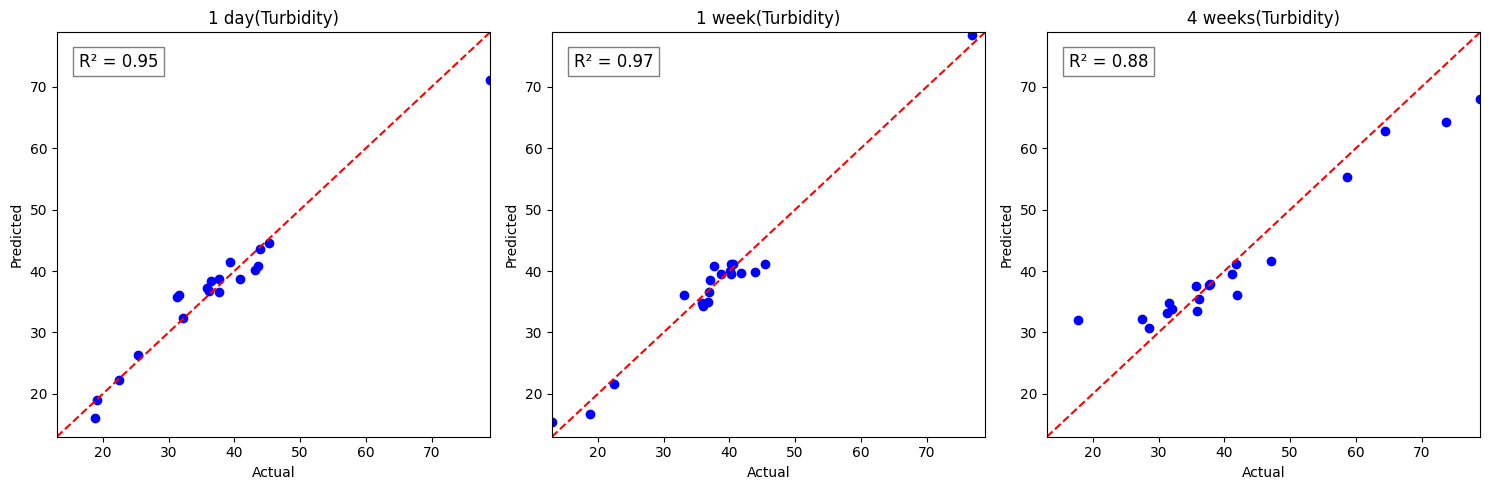

In [ ]:
# Number of features
n_features = y_test.shape[1]

# Create subplots
fig, axes = plt.subplots(1, n_features, figsize=(15, 5))

# Titles for each subplot
titles = ['1 day(Turbidity)', '1 week(Turbidity)', '4 weeks(Turbidity)']

# Determine common axis limits
x_min = min(y_test.min(), y_pred.min())
x_max = max(y_test.max(), y_pred.max())

for i in range(n_features):
    axes[i].scatter(y_test[:, i], y_pred[:, i], c='blue')
    axes[i].plot([x_min, x_max], [x_min, x_max], 'r--')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(x_min, x_max)
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].set_title(titles[i])

    # Calculate and annotate R² value
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    axes[i].text(0.05, 0.95, f'R² = {r2:.2f}', transform=axes[i].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()